In [51]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
plt.style.use("ggplot")
START_DATE = {
  'US': '1/22/20'
}
country = "US"
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
country_df = df[df['Country/Region'] == country]
data = country_df.iloc[0].loc[START_DATE[country]:]
data = data.to_numpy().astype(float)
data = data/1e4

## Raw Data

1/22/2020 - 5/3/2020, US confirmed cases (source: HDX)

Text(0, 0.5, 'Confirmed Case (10000)')

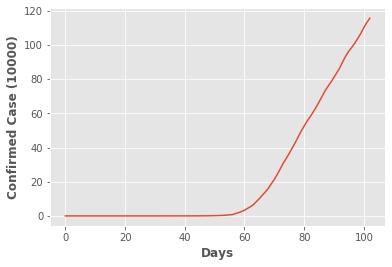

In [52]:
plt.plot(data)
plt.xlabel("Days",fontweight="bold")
plt.ylabel("Confirmed Case (10000)",fontweight="bold")

In [61]:
def sirmodel(y, t, N, num_cont, prob, gamma):
    beta = num_cont * prob
    S,I,R = y
    dsdt = -beta * I * S / N
    didt = beta * I * S / N - gamma * I
    drdt = gamma *I
    return dsdt, didt, drdt

def sirplot(model, y0, t, N, num_cont, prob, gamma):
    result = odeint(model, y0, t, args=(N, num_cont, prob, gamma))
    S, I, R = result.T
    # plt.plot(S, '-g', label='Susceptibles')
    plt.plot(I, '-r', label='Infectious')
    # plt.plot(R, '-k', label='Recovereds')
    plt.xlabel("Days",fontweight="bold")
    plt.ylabel("Number (10000)",fontweight="bold")
    return result

# Initial simulation

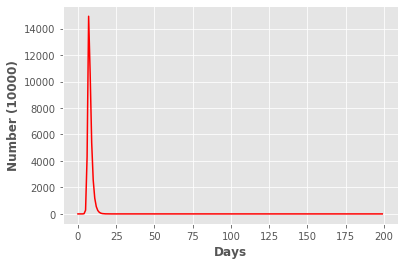

In [64]:
s0 = 3.3e4
i0 = 1e-4
r0 = 0
N = 3.3e4
num_cont = 18
prob = 0.21
gamma = 0.81
y0 = s0, i0, r0
t = np.arange(0,200,1)
result = sirplot(sirmodel, y0, t, N, num_cont, prob, gamma)

# One sample set of parameters

When the days = 100, the number of cases is above 100

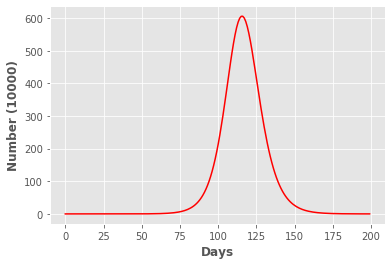

In [117]:
num_cont = 3.8
gamma = 0.65
result = sirplot(sirmodel, y0, t, N, num_cont, prob, gamma)

In [ ]:
beta,gamma = [0.36,0.21]

def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

In [ ]:
sol = solve_ivp(SIR,[0,100],[3300,1e-6,0],t_eval=np.arange(0, 100, 1))

fig = plt.figure(figsize=(12,4))
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,sol.y[2])
# plt.plot(np.arange(0,103),data,"k*:")
plt.grid("True")
plt.legend(["Susceptible","Infected","Removed","Original Data"])

In [ ]:
def loss(point, data):
    """
    RMSE between actual confirmed cases and the estimated infectious people with given beta and gamma.
    """
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [S_0,I_0,R_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

In [ ]:
data = country_df.iloc[0].loc[START_DATE[country]:]
optimal = minimize(
    loss,
    [0.001, 0.001],
    args=(data),
    method='L-BFGS-B',
    bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
)
beta, gamma = optimal.x
new_index, extended_actual, prediction = self.predict(beta, gamma, data)
df = pd.DataFrame({
    'Actual': extended_actual,
    'S': prediction.y[0],
    'I': prediction.y[1],
    'R': prediction.y[2]
}, index=new_index)
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title(self.country)
df.plot(ax=ax)
fig.savefig(f"{self.country}.png")

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import ode, solve_ivp
def sir_ode(times,init,parms):
    b, g = parms
    S,I,R = init
    # ODEs
    dS = -b*S*I
    dI = b*S*I-g*I
    dR = g*I
    return [dS,dI,dR]

In [12]:
parms = [3.6e-4,0.81]
init = [3e4,1e-4,0]
times = np.linspace(0,200,2001)

In [13]:
sir_sol = solve_ivp(fun=lambda t, y: sir_ode(t, y, parms), t_span=[min(times),max(times)], y0=init, t_eval=times)
sir_out = pd.DataFrame({"t":sir_sol["t"],"S":sir_sol["y"][0],"I":sir_sol["y"][1],"R":sir_sol["y"][2]})


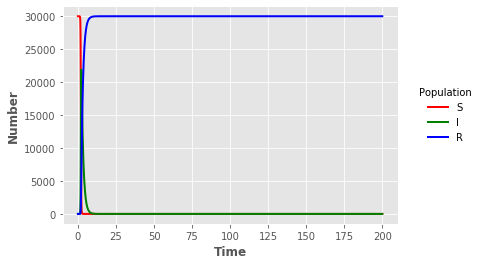

In [14]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sline = plt.plot("t","S","",data=sir_out,color="red",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)